In [1]:
import pandas as pd
import numpy as np

# Analisis básico

En esta notebook se hace un análisis muy básico de la data

No tiene que hacer nada más que entenderla

In [2]:
df = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [3]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910
...,...,...,...,...,...
5659,CHEMBL4779440,Brc1ccc([N+]2=Cc3ccccc3CC2)cc1.[Br-],10500.0,10500.0,4.978811
5660,CHEMBL417799,C[n+]1cc2c3c(ccc2c2ccc4cc5c(cc4c21)OCO5)OCO3,1220.0,1220.0,5.913640
5661,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,1450.0,1450.0,5.838632
5662,CHEMBL3085398,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,28980.0,28980.0,4.537902


In [4]:
df['molecule_chembl_id'].unique().shape

(5664,)

In [5]:
df.describe()

,standard_value,standard_value_norm,pIC50
count,5.664000e+03,5.664000e+03,5664.000000
mean,2.661603e+12,2.859297e+05,inf
std,1.083101e+14,4.301237e+06,NaN
min,0.000000e+00,0.000000e+00,-6.770000
25%,1.433750e+02,1.433750e+02,4.769551
50%,2.365000e+03,2.365000e+03,5.626170
75%,1.700000e+04,1.700000e+04,6.843527
max,5.888437e+15,1.000000e+08,inf


In [6]:
df['standard_value'] = df['standard_value'].apply(pd.to_numeric)

In [7]:
# En el video se hace esta normalización. No la veo del todo necesaria (coment Julian)
# Entiendo lo hace para que los valores le queden > 1 y no haya números negativos
df['standard_value_norm'] = df['standard_value'].apply(lambda x: (x>1e8)*1e8 + (x<=1e8)*x)

In [8]:
#Agrego el 1e-10 asumiendo que el 0 se debe a falta de precision en la medicion, es decir equivale a un numero muy pequeño (alta bioactividad), para no descartar ese caso
df['pIC50'] = df['standard_value'].apply(lambda x: -np.log10(x*(1e-9)+1e-10))
df['pIC50_2'] = df['standard_value_norm'].apply(lambda x: -np.log10(x*(1e-9)+1e-10))

In [9]:
df.describe()

,standard_value,standard_value_norm,pIC50,pIC50_2
count,5.664000e+03,5.664000e+03,5664.000000,5664.000000
mean,2.661603e+12,2.859297e+05,5.790007,5.801494
std,1.083101e+14,4.301237e+06,1.578323,1.518066
min,0.000000e+00,0.000000e+00,-6.770000,1.000000
25%,1.433750e+02,1.433750e+02,4.769549,4.769549
50%,2.365000e+03,2.365000e+03,5.626151,5.626151
75%,1.700000e+04,1.700000e+04,6.843224,6.843224
max,5.888437e+15,1.000000e+08,10.000000,10.000000


In [66]:
# Rango dinámico del standar value
df['standard_value'].max(), df['standard_value'].min()

(5888436553555884.0, 0.0)

In [67]:
df[df['standard_value']==df['standard_value'].min()]

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50,pIC50_2,canonical_len
5463,CHEMBL4780352,COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(OCCCCN[N+]3(C)...,0.0,0.0,10.0,10.0,104


In [70]:
-np.log10(min(df[df['standard_value']>df['standard_value'].min()]['standard_value'])*(10**-9)+1e-10)
#min(df[df['standard_value']>df['standard_value'].min()]['standard_value'])

9.999978285818754

In [71]:
# Rango dinámico del pIC50
df['pIC50'].max(), df['pIC50'].min()

(10.0, -6.77)

In [72]:
# Rango dinámico del pIC50_2
df['pIC50_2'].max(), df['pIC50_2'].min()

(10.0, 0.9999999995657055)

# Histograma de longitudes de los smiles

In [73]:
df['canonical_len'] = df['canonical_smiles'].apply(lambda x: len(x))

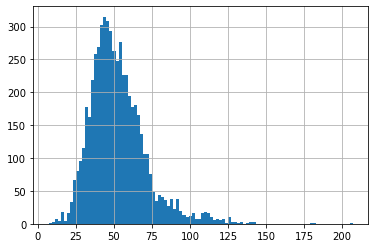

In [74]:
df['canonical_len'].hist(bins=100)

In [75]:
# Max y min 
max_sequence_len = df['canonical_len'].max()
max_sequence_len, df['canonical_len'].min()

(207, 7)

In [76]:
max_len_idx = df['canonical_len'].argmax()
min_len_idx = df['canonical_len'].argmin()

In [77]:
# Ejemplo de molécula más larga
df.iloc[max_len_idx].canonical_smiles

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

In [78]:
# Ejemplo de molécula más corta
df.iloc[min_len_idx].canonical_smiles

'NC(=O)O'

# Histograma de caracteres

In [79]:
from collections import Counter

In [80]:
text = ''
for cs in df['canonical_smiles']:
    text = text + cs

In [81]:
vocab_hist = dict(Counter(text))

In [82]:
vocab_hist

{'C': 62301,
 'O': 14009,
 'c': 72788,
 '1': 16670,
 'n': 4542,
 '(': 23475,
 '-': 2147,
 '2': 13334,
 '3': 8201,
 ')': 23475,
 '=': 8658,
 'o': 779,
 'N': 10359,
 'l': 1548,
 'S': 628,
 'F': 1162,
 '[': 6001,
 '@': 4527,
 'H': 2456,
 ']': 6001,
 '/': 1817,
 '\\': 373,
 '+': 1297,
 '.': 1317,
 'B': 706,
 'r': 682,
 '4': 3420,
 '#': 366,
 'I': 109,
 's': 270,
 '5': 972,
 '6': 230,
 'P': 34,
 'a': 1,
 '7': 18,
 '8': 6,
 'e': 35,
 'i': 2}

In [83]:
df.to_csv('acetylcholinesterase_02_bioactivity_data_preprocessed_4.csv', index=False)